In [17]:
import pandas as pd

# Load the uploaded Excel file
file_path = r"C:\Users\Admin\Downloads\Final_df.xlsx"
excel_data = pd.ExcelFile(file_path)

# Display the sheet names to understand the structure
excel_data.sheet_names


['Sheet1']

In [18]:
# Load the data from the first sheet
df = excel_data.parse('Sheet1')

# Display the first few rows to understand the structure
df.head()


,User,Person,Current Age,Gender,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Debt to Income Ratio,Income Bracket,...,Total Spend,Avg Transaction Amount,Spend Std Dev,Fraud Rate,Chip Usage Rate,Active Months,Avg Monthly Spend,Essential,Lifestyle,Other
0,0,Hazel Robinson,53,Female,59696,127613,787,5,2.137714,High,...,1622991.69,81.299989,94.159093,0.001353,0.140660,210,7728.531857,1118708.09,296831.90,207451.70
1,1,Sasha Sadr,53,Female,77254,191349,701,5,2.476881,High,...,723491.89,81.118050,156.784691,0.003700,0.287700,200,3617.459450,282727.81,146664.75,294099.33
2,2,Saanvi Lee,81,Female,33483,196,698,5,0.005854,Medium,...,1475933.36,35.159687,54.298552,0.001048,0.125280,216,6833.024815,496422.14,121721.87,857789.35
3,3,Everlee Clark,63,Female,249925,202328,722,4,0.809555,High,...,1186497.51,117.277603,268.654472,0.001977,0.392705,157,7557.308981,507522.30,317181.76,361793.45
4,4,Kyle Peterson,43,Male,109687,183855,675,1,1.676179,High,...,1798790.91,97.011698,138.619564,0.000108,0.205857,244,7372.093893,842439.67,447071.94,509279.30


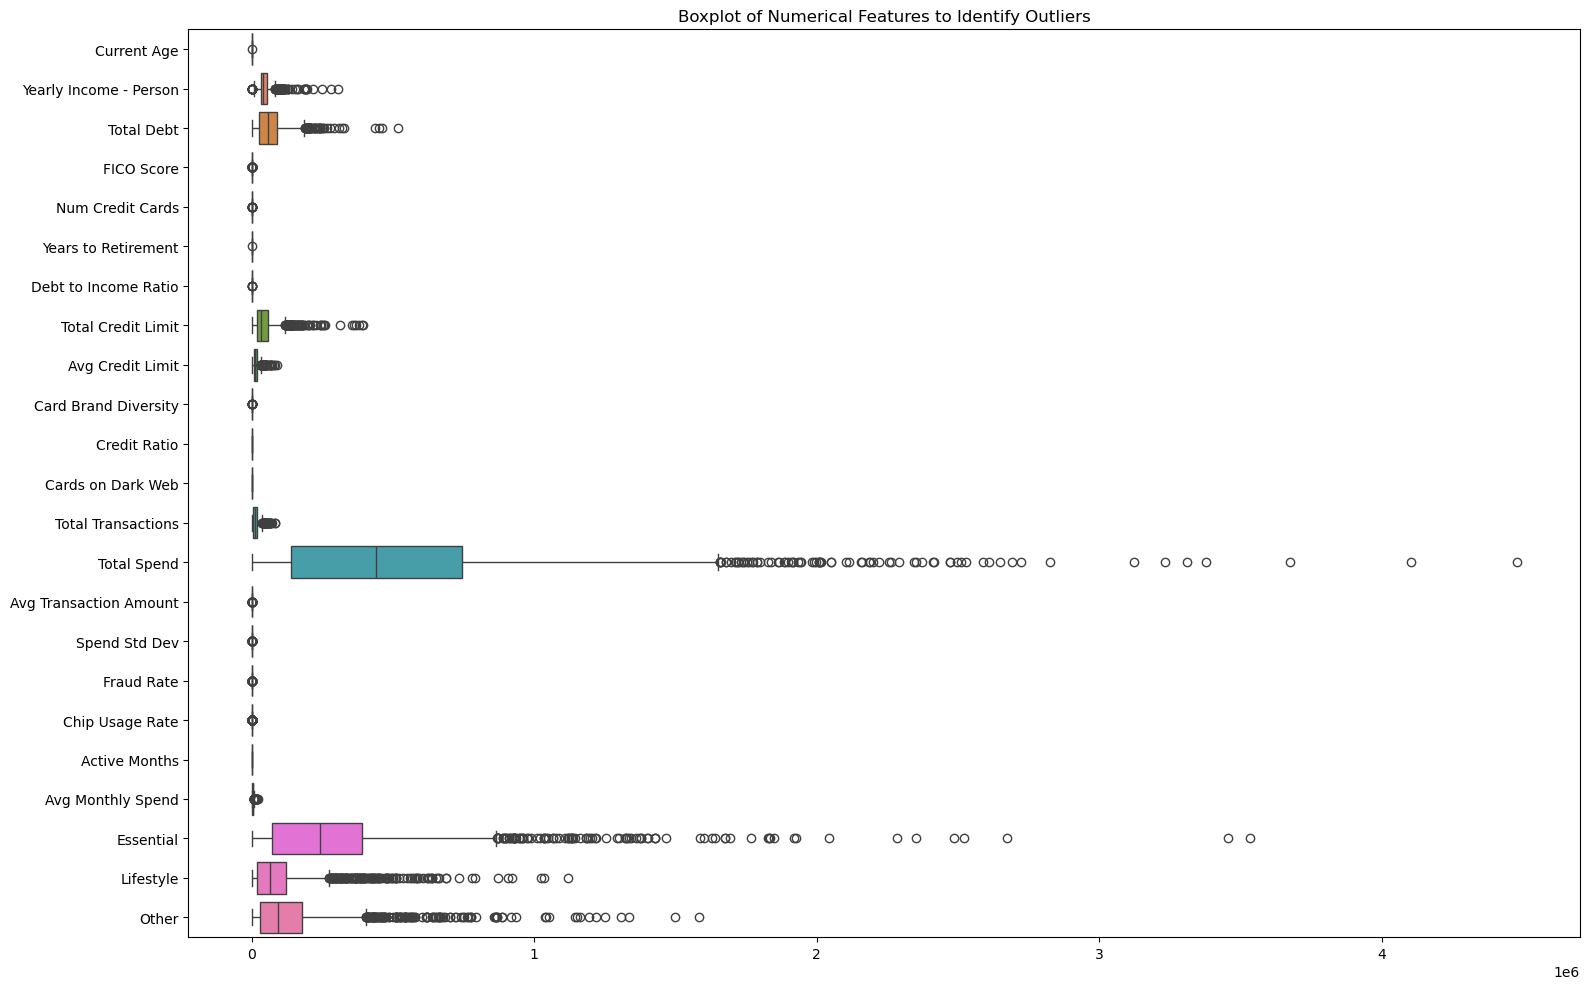

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns# Select numerical features for clustering and analysis
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['User'])

# Plot boxplots to visualize outliers in each feature
plt.figure(figsize=(16, 10))
sns.boxplot(data=numeric_df, orient='h')
plt.title("Boxplot of Numerical Features to Identify Outliers")
plt.tight_layout()
plt.show()

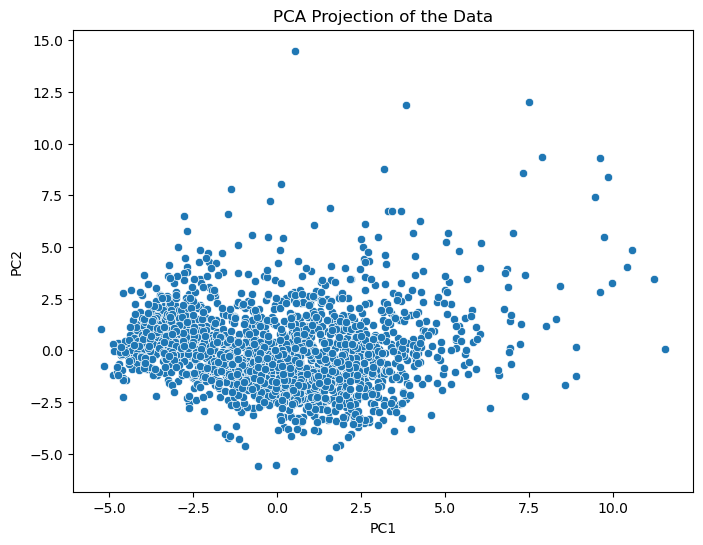

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Normalize the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# Use PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Create a DataFrame for easy plotting
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

# Display the PCA-reduced data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title("PCA Projection of the Data")
plt.show()


In [19]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Select numeric columns only (and drop NA if needed)
numeric_data = df.select_dtypes(include=['float64', 'int64']).dropna()

# Standardize the data before calculating VIF
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Create a DataFrame to hold VIF results
vif_df = pd.DataFrame()
vif_df["Feature"] = numeric_data.columns
vif_df["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]

# Sort by VIF
vif_df.sort_values(by="VIF", ascending=False, inplace=True)

C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
C:\Users\Admin\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [20]:
vif_df.to_excel("vif.xlsx")

K-Means Clustering:
Silhouette Score: 0.3692
Davies-Bouldin Score: 0.9941



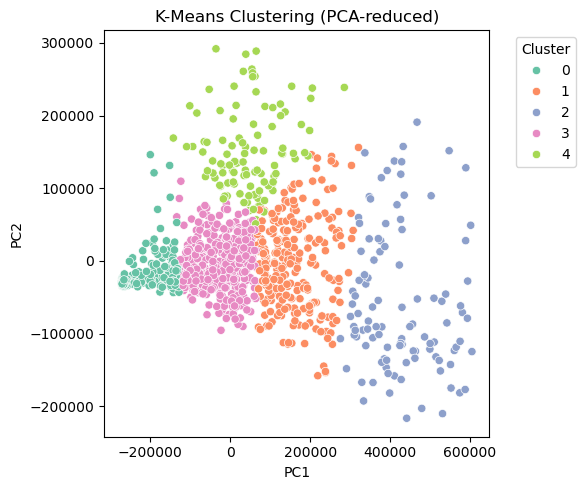

Ward's Hierarchical Clustering:
Silhouette Score: 0.4122
Davies-Bouldin Score: 0.7990



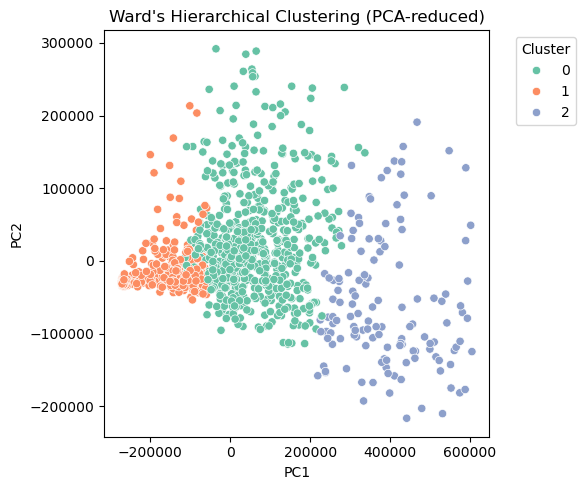

In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file
df = pd.read_excel(r"C:\Users\Admin\Downloads\Final.xlsx")  # update the path if needed

# Keep only numeric data
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0', 'User'], errors='ignore')

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
scaled_data= cleaned_numeric_df.copy()
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Function to apply clustering and score
def apply_clustering(model, data, name):
    labels = model.fit_predict(data)
    sil_score = silhouette_score(data, labels)
    db_score = davies_bouldin_score(data, labels)
    print(f"{name} Clustering:")
    print(f"Silhouette Score: {sil_score:.4f}")
    print(f"Davies-Bouldin Score: {db_score:.4f}\n")

    # Plot clusters
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='Set2')
    plt.title(f"{name} Clustering (PCA-reduced)")
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
apply_clustering(kmeans, scaled_data, "K-Means")

# Apply Agglomerative Clustering with Ward's method
ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
apply_clustering(ward, scaled_data, "Ward's Hierarchical")


In [58]:
kmeans

KMeans(n_clusters=5, random_state=42)

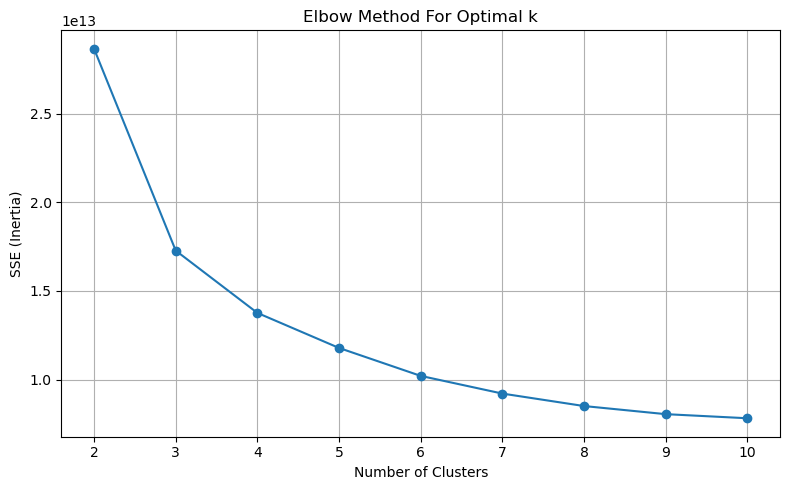

In [36]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

# Load and preprocess data
df = pd.read_excel(r"C:\Users\Admin\Downloads\Final.xlsx")  # Adjust path if needed
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0', 'User'], errors='ignore')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
scaled_data= cleaned_numeric_df.copy()
# Elbow method - test multiple cluster counts
sse = []
k_range = range(2, 11)  # Try from 2 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Inertia)')
plt.xticks(k_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_excel(r"C:\Users\Admin\Downloads\Final.xlsx")
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0', 'User'], errors='ignore')

# Detect and remove outliers using IQR method, but preserve index
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data[mask]

# Filter numeric data (removing outliers)
cleaned_numeric_df = remove_outliers_iqr(numeric_df)

# Get the corresponding cleaned original dataframe (if needed)
cleaned_original_df = df.loc[cleaned_numeric_df.index]

# Optional: Normalize cleaned data
scaler = StandardScaler()
scaled_cleaned_data = scaler.fit_transform(cleaned_numeric_df)

# Output: cleaned_numeric_df (for clustering), cleaned_original_df (for full info)
print("Original shape:", df.shape)
print("Cleaned shape :", cleaned_numeric_df.shape)


Original shape: (2000, 25)
Cleaned shape : (1220, 21)


In [61]:
import pandas as pd
from scipy.stats import zscore

# Load your data
df = pd.read_excel(r"C:\Users\Admin\Downloads\Final.xlsx")  # Adjust path if needed
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0', 'User'], errors='ignore')

# Calculate Z-scores
z_scores = numeric_df.apply(zscore)

# Set a threshold for outlier removal (commonly 3)
threshold = 3
mask = (z_scores.abs() < threshold).all(axis=1)

# Remove outliers while preserving index
cleaned_df = numeric_df[mask]

# Optionally, get the corresponding original rows (e.g., with names or IDs)
original_cleaned_df = df.loc[cleaned_df.index]

# Show shape before and after
print("Original shape:", numeric_df.shape)
print("After Z-score outlier removal:", cleaned_df.shape)


Original shape: (2000, 21)
After Z-score outlier removal: (0, 21)


In [34]:
cleaned_numeric_df

,Current Age,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Debt to Income Ratio,Total Credit Limit,Avg Credit Limit,Card Brand Diversity,Credit Ratio,...,Total Transactions,Avg Transaction Amount,Spend Std Dev,Fraud Rate,Chip Usage Rate,Active Months,Avg Monthly Spend,Essential,Lifestyle,Other
7,26,54623,114711,728,1,2.100049,17480,17480.000000,1,0.000000,...,236,53.513475,50.791944,0.000000,0.000000,2,6314.590000,6430.12,4617.76,1581.30
9,34,38190,81262,810,1,2.127835,9496,9496.000000,1,0.000000,...,18284,21.364994,70.883468,0.000602,0.320335,129,3028.198062,259993.35,45439.31,85204.89
13,34,41442,78833,712,3,1.902249,28449,9483.000000,2,0.333333,...,7313,41.377038,98.741893,0.002598,0.326952,164,1845.062683,139103.57,27697.18,135789.53
14,48,20513,32509,599,1,1.584800,4147,4147.000000,1,0.000000,...,11396,61.753861,40.999956,0.000000,0.241664,135,5212.940741,623271.68,50689.80,29785.52
15,41,23123,5079,723,6,0.219651,29278,4879.666667,3,0.500000,...,14578,24.809491,47.913191,0.002195,0.230759,217,1666.694747,266109.70,47043.67,48519.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,32,48010,87837,703,3,1.829556,60711,20237.000000,2,0.333333,...,14713,23.714135,89.651878,0.000816,0.258071,156,2236.577372,236524.70,38744.61,73636.76
1996,62,49378,104480,740,4,2.115922,50440,12610.000000,2,0.250000,...,18012,41.056417,83.100747,0.002776,0.158616,218,3392.239404,372614.10,122972.59,243921.50
1997,47,30942,71066,779,3,2.296749,29015,9671.666667,3,0.666667,...,21607,32.636233,72.294862,0.000926,0.273337,232,3039.530517,365286.90,118600.67,221283.51
1998,66,54654,27241,618,1,0.498426,9200,9200.000000,1,1.000000,...,5782,58.956214,140.808262,0.000000,0.000000,97,3514.276598,151906.91,56313.29,132664.63


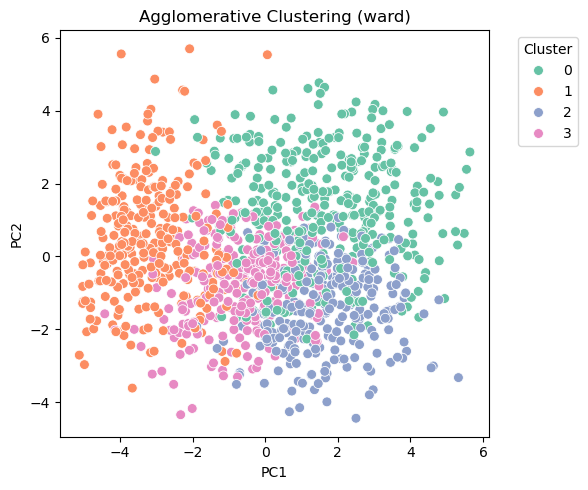

Linkage Method: ward
Silhouette Score: 0.0557
Davies-Bouldin Score: 2.5489



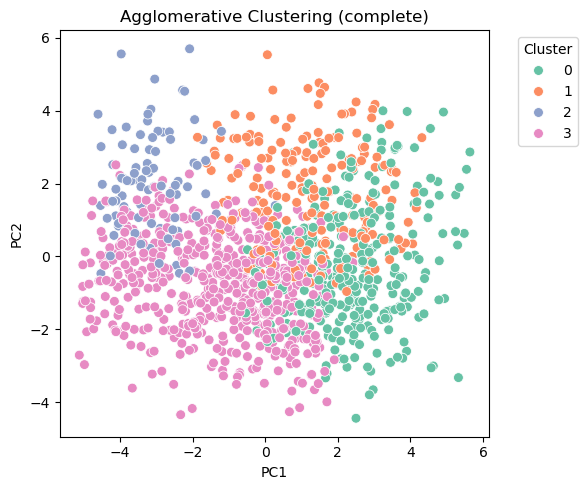

Linkage Method: complete
Silhouette Score: 0.0612
Davies-Bouldin Score: 2.6361



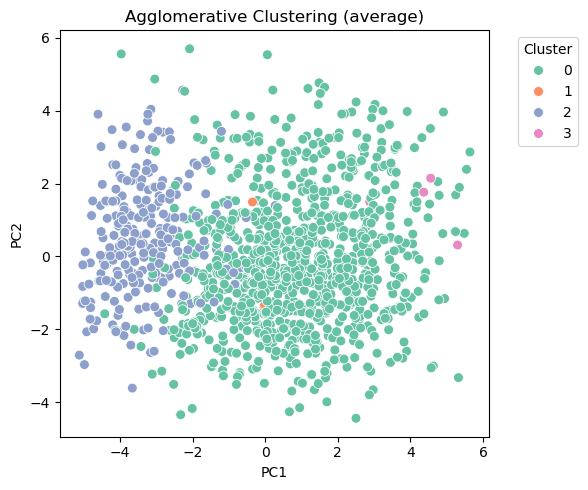

Linkage Method: average
Silhouette Score: 0.1024
Davies-Bouldin Score: 1.5892



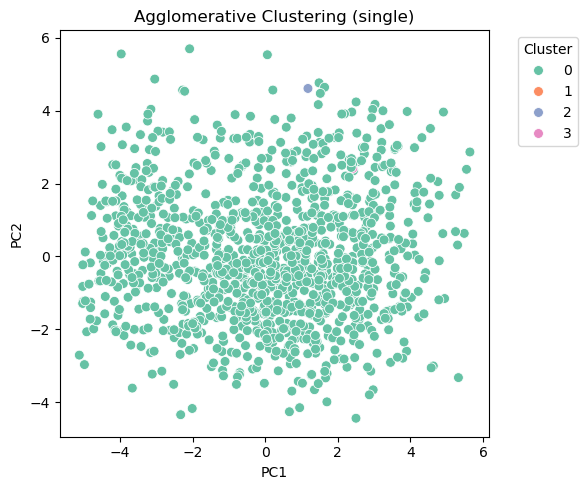

Linkage Method: single
Silhouette Score: 0.1020
Davies-Bouldin Score: 0.6762



In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import AgglomerativeClustering

# Load dataset
df = pd.read_excel(r"C:\Users\Admin\Downloads\Final.xlsx")
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0', 'User'], errors='ignore')

# Outlier removal with IQR (preserve index)
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data[mask]

cleaned_data = remove_outliers_iqr(numeric_df)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)

# PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Define linkage methods (ward requires Euclidean and no other distance metric)
linkage_methods = ['ward', 'complete', 'average', 'single']

# Loop through each method
for method in linkage_methods:
    try:
        model = AgglomerativeClustering(n_clusters=4, linkage=method)
        labels = model.fit_predict(scaled_data)
        
        # Evaluate
        sil = silhouette_score(scaled_data, labels)
        db = davies_bouldin_score(scaled_data, labels)
        
        # Plotting
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette='Set2', s=50)
        plt.title(f"Agglomerative Clustering ({method})")
        plt.xlabel('PC1')
        plt.ylabel('PC2')
        plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        print(f"Linkage Method: {method}")
        print(f"Silhouette Score: {sil:.4f}")
        print(f"Davies-Bouldin Score: {db:.4f}\n")

    except Exception as e:
        print(f"{method} linkage failed: {e}")


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the Excel file
file_path = r"C:\Users\Admin\Downloads\Final.xlsx"
df = pd.read_excel(file_path)

# Keep only numeric columns and drop unnecessary ones
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0', 'User'], errors='ignore')

# Function to remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return data[mask]

# Remove outliers
cleaned_df = remove_outliers_iqr(numeric_df)

# Standardize the cleaned data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df)
scaled_data= cleaned_numeric_df.copy()
# Apply KMeans clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Add cluster labels to original cleaned DataFrame
clustered_df = cleaned_df.copy()
clustered_df['Cluster'] = labels

# Save the clustered dataset to Excel
output_path = "clustered_kmeans_k5.xlsx"
clustered_df.to_excel(output_path, index=False)

# Calculate evaluation scores
sil_score = silhouette_score(scaled_data, labels)
db_score = davies_bouldin_score(scaled_data, labels)

output_path, sil_score, db_score


NameError: name 'cleaned_numeric_df' is not defined

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the Excel file
file_path = r"C:\Users\Admin\Downloads\Final.xlsx"
df = pd.read_excel(file_path)

# Store original index and User ID (if available) for mapping later
df['original_index'] = df.index  # optional but helps if User is not unique
if 'User' in df.columns:
    id_col = df['User']
else:
    id_col = df['original_index']

# Keep only numeric columns for clustering
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Unnamed: 0', 'User'], errors='ignore')

# Function to remove outliers using IQR
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
    return mask  # return boolean mask instead of just data

# Get the outlier mask
outlier_mask = remove_outliers_iqr(numeric_df)

# Apply mask to both numeric data and IDs
cleaned_df = numeric_df[outlier_mask]
cleaned_ids = id_col[outlier_mask].reset_index(drop=True)

# Standardize the cleaned data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_df)

# Apply KMeans clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(scaled_data)

# Add cluster labels and IDs to cleaned DataFrame
clustered_df = cleaned_df.copy()
clustered_df['Cluster'] = labels
clustered_df['User'] = cleaned_ids  # this allows you to map back

# Save the clustered dataset to Excel
output_path = "clustered_kmeans_k5.xlsx"
clustered_df.to_excel(output_path, index=False)

# Evaluation scores
sil_score = silhouette_score(scaled_data, labels)
db_score = davies_bouldin_score(scaled_data, labels)

output_path, sil_score, db_score


('clustered_kmeans_k5.xlsx', 0.10309602364397176, 2.287638257783361)

In [3]:
import pandas as pd

# Load the uploaded files
user_data_path = r"C:\Users\Admin\Downloads\archive (32)\sd254_users.csv"
clustered_data_path = r"C:\Users\Admin\Downloads\clustered_kmeans_k5.xlsx"

# Read the user data CSV and clustered Excel data
user_df = pd.read_csv(user_data_path)
clustered_df = pd.read_excel(clustered_data_path)

# Display first few rows of each to understand structure
user_df.head(), clustered_df.head()


(           Person  Current Age  Retirement Age  Birth Year  Birth Month  \
 0  Hazel Robinson           53              66        1966           11   
 1      Sasha Sadr           53              68        1966           12   
 2      Saanvi Lee           81              67        1938           11   
 3   Everlee Clark           63              63        1957            1   
 4   Kyle Peterson           43              70        1976            9   
 
    Gender                   Address  Apartment           City State  Zipcode  \
 0  Female             462 Rose Lane        NaN       La Verne    CA    91750   
 1  Female    3606 Federal Boulevard        NaN    Little Neck    NY    11363   
 2  Female           766 Third Drive        NaN    West Covina    CA    91792   
 3  Female          3 Madison Street        NaN       New York    NY    10069   
 4    Male  9620 Valley Stream Drive        NaN  San Francisco    CA    94117   
 
    Latitude  Longitude Per Capita Income - Zipcode Ye

In [4]:
# Clean and convert relevant columns for matching in both datasets

# Remove $ and commas, convert to numeric in user_df
user_df["Yearly Income - Person"] = user_df["Yearly Income - Person"].replace('[\$,]', '', regex=True).astype(float)
user_df["Total Debt"] = user_df["Total Debt"].replace('[\$,]', '', regex=True).astype(float)

# Select key matching columns
matching_columns = ["Current Age", "Yearly Income - Person", "Total Debt", "FICO Score", "Num Credit Cards"]

# Round values to nearest whole number for easier matching
user_clean = user_df.copy()
clustered_clean = clustered_df.copy()
user_clean[matching_columns] = user_clean[matching_columns].round(0)
clustered_clean[matching_columns] = clustered_clean[matching_columns].round(0)

# Merge the datasets on these columns
merged = pd.merge(user_clean, clustered_clean, on=matching_columns, how="left", indicator=True)

# Mark outliers
merged["Status"] = merged["_merge"].apply(lambda x: "Outlier" if x == "left_only" else "Clustered")

# Show result with person name and status
result = merged[["Person", *matching_columns, "Status"]]
result.head(10)


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Admin\AppData\Local\Temp\ipykernel_15364\419843796.py:4: SyntaxWarning: invalid escape sequence '\$'
  user_df["Yearly Income - Person"] = user_df["Yearly Income - Person"].replace('[\$,]', '', regex=True).astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_15364\419843796.py:5: SyntaxWarning: invalid escape sequence '\$'
  user_df["Total Debt"] = user_df["Total Debt"].replace('[\$,]', '', regex=True).astype(float)


,Person,Current Age,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Status
0,Hazel Robinson,53,59696.0,127613.0,787,5,Outlier
1,Sasha Sadr,53,77254.0,191349.0,701,5,Outlier
2,Saanvi Lee,81,33483.0,196.0,698,5,Outlier
3,Everlee Clark,63,249925.0,202328.0,722,4,Outlier
4,Kyle Peterson,43,109687.0,183855.0,675,1,Outlier
5,Aldo Walker,42,41997.0,0.0,704,3,Outlier
6,Katalina Lewis,36,51500.0,102286.0,672,3,Outlier
7,Ryland Howard,26,54623.0,114711.0,728,1,Clustered
8,Kenya Cooper,81,42509.0,2895.0,755,5,Outlier
9,Sawyer Butler,34,38190.0,81262.0,810,1,Clustered


In [5]:
# Add cluster label from the clustered data
# Keep the cluster column only if the row matched
merged["Cluster"] = merged.apply(lambda row: int(row["Cluster"]) if row["Status"] == "Clustered" else "Outlier", axis=1)

# Final result with cluster info
final_result = merged[["Person", *matching_columns, "Status", "Cluster"]]
final_result.head(10)


,Person,Current Age,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Status,Cluster
0,Hazel Robinson,53,59696.0,127613.0,787,5,Outlier,Outlier
1,Sasha Sadr,53,77254.0,191349.0,701,5,Outlier,Outlier
2,Saanvi Lee,81,33483.0,196.0,698,5,Outlier,Outlier
3,Everlee Clark,63,249925.0,202328.0,722,4,Outlier,Outlier
4,Kyle Peterson,43,109687.0,183855.0,675,1,Outlier,Outlier
5,Aldo Walker,42,41997.0,0.0,704,3,Outlier,Outlier
6,Katalina Lewis,36,51500.0,102286.0,672,3,Outlier,Outlier
7,Ryland Howard,26,54623.0,114711.0,728,1,Clustered,0
8,Kenya Cooper,81,42509.0,2895.0,755,5,Outlier,Outlier
9,Sawyer Butler,34,38190.0,81262.0,810,1,Clustered,3


In [6]:
final_result.to_excel("outlier and cluster users.xlsx")